# Heat Map

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read stemmed report, word reference table, lsa results
report = pd.read_csv("02-ASRS-stemmed.csv", index_col=0)
word_reference = pd.read_csv("02-ASRS-word-reference.csv", index_col=0)

# Word reference lookup helper
def lookup(word):
    for i in range(len(word_reference)):
        if word_reference['after'][i] == word:
            print(word_reference['before'][i])
            break

In [3]:
# Read original report data
data = pd.read_csv("02-ASRS_DBOnline.csv",index_col=0).reset_index()
data = data[1:].reset_index(drop=True)

In [4]:
df = data[['Place.5', 'Assessments.1']]
df.columns = ['Altitude', 'Primary Problem']
df.to_csv('04-ASRS-altitude-primary-problems.csv')
df.head()
df = df.dropna()
df['Altitude'] = df['Altitude'].astype(int)

In [5]:
primary_problems = df.groupby('Primary Problem').size().index.tolist()
altitudes = df.groupby('Altitude').size().index
print('Primary problems: {}'.format(primary_problems))
print('Min altitude: {}'.format(min(altitudes)))
print('Max altitude: {}'.format(max(altitudes)))

Primary problems: ['ATC Equipment / Nav Facility / Buildings', 'Aircraft', 'Airport', 'Airspace Structure', 'Ambiguous', 'Environment - Non Weather Related', 'Human Factors', 'Procedure', 'Staffing', 'Weather']
Min altitude: 0
Max altitude: 43000


In [6]:
altitude_ranges = [range(10000), range(10000, 20000), range(20000, 30000), range(30000, 40000), range(40000, 50000)]
df_count = pd.DataFrame(np.zeros((len(altitude_ranges), len(primary_problems))))
df_count.columns = primary_problems
df_count.index = ['0-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000']

In [7]:
for index, row in df.iterrows():
    alt = int(row['Altitude'])
    p = row['Primary Problem']
    for i in range(len(altitude_ranges)):
        if alt in altitude_ranges[i]:
            df_count.iloc[i][p] += 1
df_count

,ATC Equipment / Nav Facility / Buildings,Aircraft,Airport,Airspace Structure,Ambiguous,Environment - Non Weather Related,Human Factors,Procedure,Staffing,Weather
0-10000,3.0,16.0,1.0,7.0,45.0,2.0,437.0,20.0,1.0,2.0
10000-20000,1.0,4.0,0.0,0.0,8.0,0.0,113.0,5.0,0.0,2.0
20000-30000,0.0,1.0,0.0,0.0,1.0,0.0,44.0,4.0,0.0,1.0
30000-40000,0.0,0.0,0.0,1.0,1.0,0.0,17.0,1.0,0.0,0.0
40000-50000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


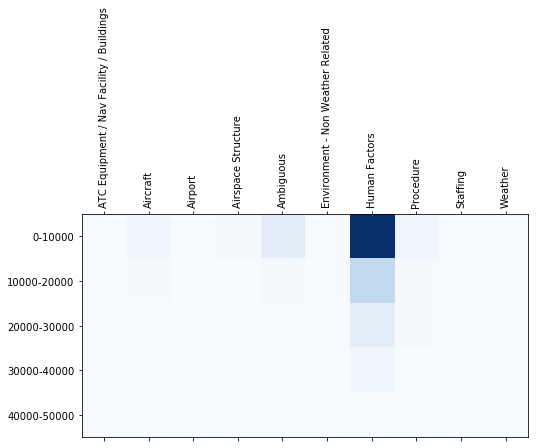

In [8]:
plt.figure(figsize=(20, 20))
plt.matshow(df_count.values, cmap=plt.cm.Blues)
plt.xticks(np.arange(df_count.shape[1]), df_count.columns.tolist(), rotation='vertical')
plt.yticks(np.arange(df_count.shape[0]), df_count.index.tolist());

In [9]:
df_count_nonhumans = df_count.drop('Human Factors', axis=1)

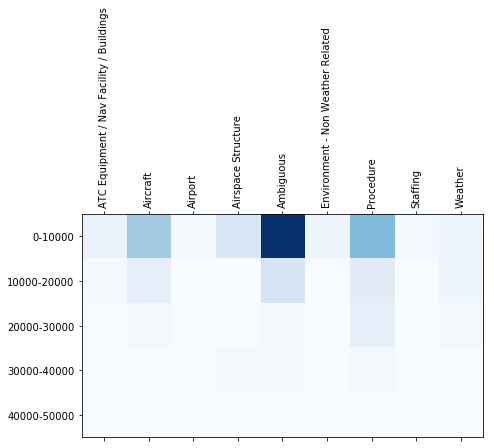

In [10]:
plt.figure(figsize=(20, 20))
plt.matshow(df_count_nonhumans.values, cmap=plt.cm.Blues)
plt.xticks(np.arange(df_count_nonhumans.shape[1]), df_count_nonhumans.columns.tolist(), rotation='vertical')
plt.yticks(np.arange(df_count_nonhumans.shape[0]), df_count_nonhumans.index.tolist());